In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

# Function to create and visualize a network with a variable number of nodes
def create_and_visualize_network(num_nodes, weights, node_activities):
    # Calculate Node 2 activity based on the other nodes and their respective weights
    node2_activity = sum(node_activities[i] * weights[i] for i in range(num_nodes) if i != 1)

    # Update Node 2 activity in node_activities
    node_activities[1] = node2_activity

    # Initialize the directed graph
    G = nx.DiGraph()

    # Add nodes and edges to the graph, avoiding self-loops
    for i in range(num_nodes):
        G.add_node(f"Node {i+1}", label=f"Activity: {node_activities[i]:.2f}")
        if i != 1:  # Skip adding self-loop to Node 2
            G.add_edge(f"Node {i+1}", "Node 2", weight=weights[i])

    # Visualize the network graph
    pos = nx.spring_layout(G, seed=42)
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = {(u, v): f'Weight: {d["weight"]}' for u, v, d in G.edges(data=True)}

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=1000)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

    plt.title(f"Neural Network Graph with {num_nodes} Nodes (Including Node 2)")
    plt.axis('off')
    plt.show()

    return node_activities

# Dictionary to store Node activations for different samples
node_activations_samples = {}

# Number of samples
num_samples = 10

# Create and visualize networks for 2 to 5 nodes, storing node activations
for num_nodes in range(2, 6):
    network_id = f"Network_{num_nodes}"
    node_activations_samples[network_id] = []

    # Generate a fixed set of weights for each network configuration
    weights = [random.randint(1, 10) for _ in range(num_nodes)]

    for sample in range(num_samples):
        # Generate random activities for each sample, excluding Node 2
        node_activities = [round(random.uniform(0.1, 0.9), 2) for _ in range(num_nodes)]
        node_activities[1] = 0  # Placeholder for Node 2 activity

        # Calculate Node 2 activity and visualize the network
        updated_activities = create_and_visualize_network(num_nodes, weights, node_activities)

        # Store node activities and their corresponding identifiers
        node_activations_samples[network_id].append({'Node Activities': [(f'Node {i+1}', act) for i, act in enumerate(updated_activities)]})

# Matrices to store node activations for different network configurations
activations_matrix_2_nodes = np.zeros((2, num_samples))
activations_matrix_3_nodes = np.zeros((3, num_samples))
activations_matrix_4_nodes = np.zeros((4, num_samples))
activations_matrix_5_nodes = np.zeros((5, num_samples))

# Iterate through the node_activations_samples and fill the matrices
for network_id, activities in node_activations_samples.items():
    num_nodes = int(network_id.split('_')[1])  # Extracting the number of nodes from the network ID

    for sample_index, activity_data in enumerate(activities):
        node_activities = [act for _, act in activity_data['Node Activities']]

        # Assign activities to the appropriate matrix
        if num_nodes == 2:
            activations_matrix_2_nodes[:, sample_index] = node_activities
        elif num_nodes == 3:
            activations_matrix_3_nodes[:, sample_index] = node_activities
        elif num_nodes == 4:
            activations_matrix_4_nodes[:, sample_index] = node_activities
        elif num_nodes == 5:
            activations_matrix_5_nodes[:, sample_index] = node_activities

# Print the matrices
print("Activations Matrix for 2 Nodes:")
print(activations_matrix_2_nodes)
print("\nActivations Matrix for 3 Nodes:")
print(activations_matrix_3_nodes)
print("\nActivations Matrix for 4 Nodes:")
print(activations_matrix_4_nodes)
print("\nActivations Matrix for 5 Nodes:")
print(activations_matrix_5_nodes)

Output hidden; open in https://colab.research.google.com to view.

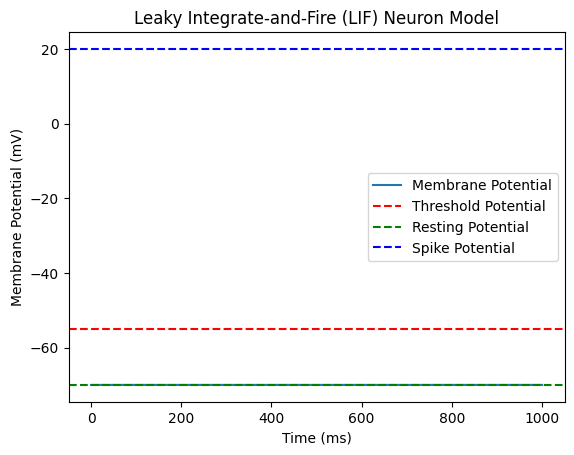

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
tau = 20   # Membrane time constant (ms)
V_rest = -70   # Resting membrane potential (mV)
V_thresh = -55   # Threshold potential (mV)
V_spike = 20   # Spike potential (mV)
dt = 0.1   # Time step (ms)
T = 1000   # Total simulation time (ms)

# Initialize variables
t = np.arange(0, T, dt)
V = np.zeros_like(t)
V[0] = V_rest

# Simulate LIF neuron
for i in range(1, len(t)):
    dV = (-V[i-1] + V_rest) / tau
    V[i] = V[i-1] + dV * dt

    # Check for spike
    if V[i] >= V_thresh:
        V[i] = V_spike

# Plot membrane potential
plt.plot(t, V, label='Membrane Potential')
plt.axhline(y=V_thresh, color='r', linestyle='--', label='Threshold Potential')
plt.axhline(y=V_rest, color='g', linestyle='--', label='Resting Potential')
plt.axhline(y=V_spike, color='b', linestyle='--', label='Spike Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.title('Leaky Integrate-and-Fire (LIF) Neuron Model')
plt.show()


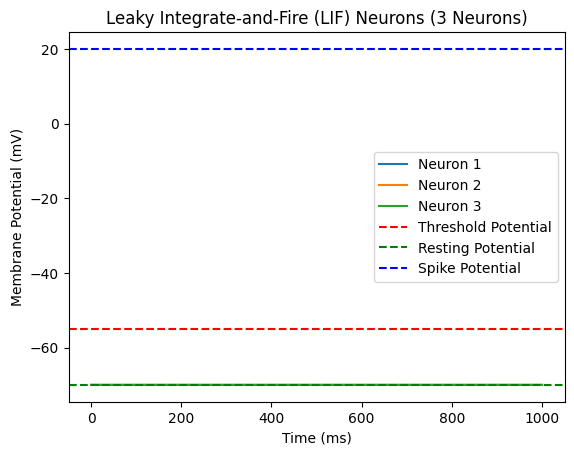

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_neurons = 3  # Number of neurons to simulate
V_rest = -70   # Resting membrane potential (mV)
V_thresh = -55   # Threshold potential (mV)
V_spike = 20   # Spike potential (mV)
dt = 0.1   # Time step (ms)
T = 1000   # Total simulation time (ms)

# Initialize variables
t = np.arange(0, T, dt)
V = np.zeros((num_neurons, len(t)))
V[:, 0] = V_rest

# Simulate LIF neurons
for i in range(1, len(t)):
    # Define random tau values for each neuron
    tau = np.random.uniform(10, 50, num_neurons)

    # Calculate change in membrane potential
    dV = (-V[:, i-1] + V_rest) / tau

    # Update membrane potential
    V[:, i] = V[:, i-1] + dV * dt

    # Check for spikes
    spikes = V[:, i] >= V_thresh
    V[spikes, i] = V_spike

# Plot membrane potentials
for n in range(num_neurons):
    plt.plot(t, V[n], label=f'Neuron {n+1}')

plt.axhline(y=V_thresh, color='r', linestyle='--', label='Threshold Potential')
plt.axhline(y=V_rest, color='g', linestyle='--', label='Resting Potential')
plt.axhline(y=V_spike, color='b', linestyle='--', label='Spike Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.title(f'Leaky Integrate-and-Fire (LIF) Neurons ({num_neurons} Neurons)')
plt.show()


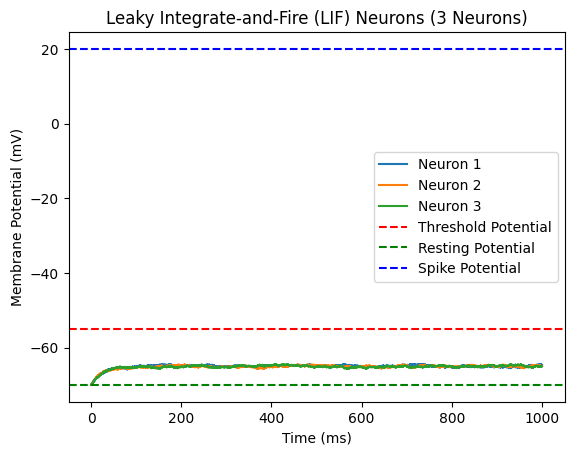

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_neurons = 3  # Number of neurons to simulate
V_rest = -70   # Resting membrane potential (mV)
V_thresh = -55   # Threshold potential (mV)
V_spike = 20   # Spike potential (mV)
dt = 0.1   # Time step (ms)
T = 1000   # Total simulation time (ms)
current_on = 10   # Input current when neuron is active (mV)
current_off = 0   # Input current when neuron is inactive (mV)

# Initialize variables
t = np.arange(0, T, dt)
V = np.zeros((num_neurons, len(t)))
V[:, 0] = V_rest

# Simulate LIF neurons
for i in range(1, len(t)):
    # Define random tau values for each neuron
    tau = np.random.uniform(10, 50, num_neurons)

    # Define random input currents for each neuron
    current = np.random.choice([current_on, current_off], num_neurons)

    # Calculate change in membrane potential
    dV = (-V[:, i-1] + V_rest + current) / tau

    # Update membrane potential
    V[:, i] = V[:, i-1] + dV * dt

    # Check for spikes
    spikes = V[:, i] >= V_thresh
    V[spikes, i] = V_spike

# Plot membrane potentials
for n in range(num_neurons):
    plt.plot(t, V[n], label=f'Neuron {n+1}')

plt.axhline(y=V_thresh, color='r', linestyle='--', label='Threshold Potential')
plt.axhline(y=V_rest, color='g', linestyle='--', label='Resting Potential')
plt.axhline(y=V_spike, color='b', linestyle='--', label='Spike Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.title(f'Leaky Integrate-and-Fire (LIF) Neurons ({num_neurons} Neurons)')
plt.show()


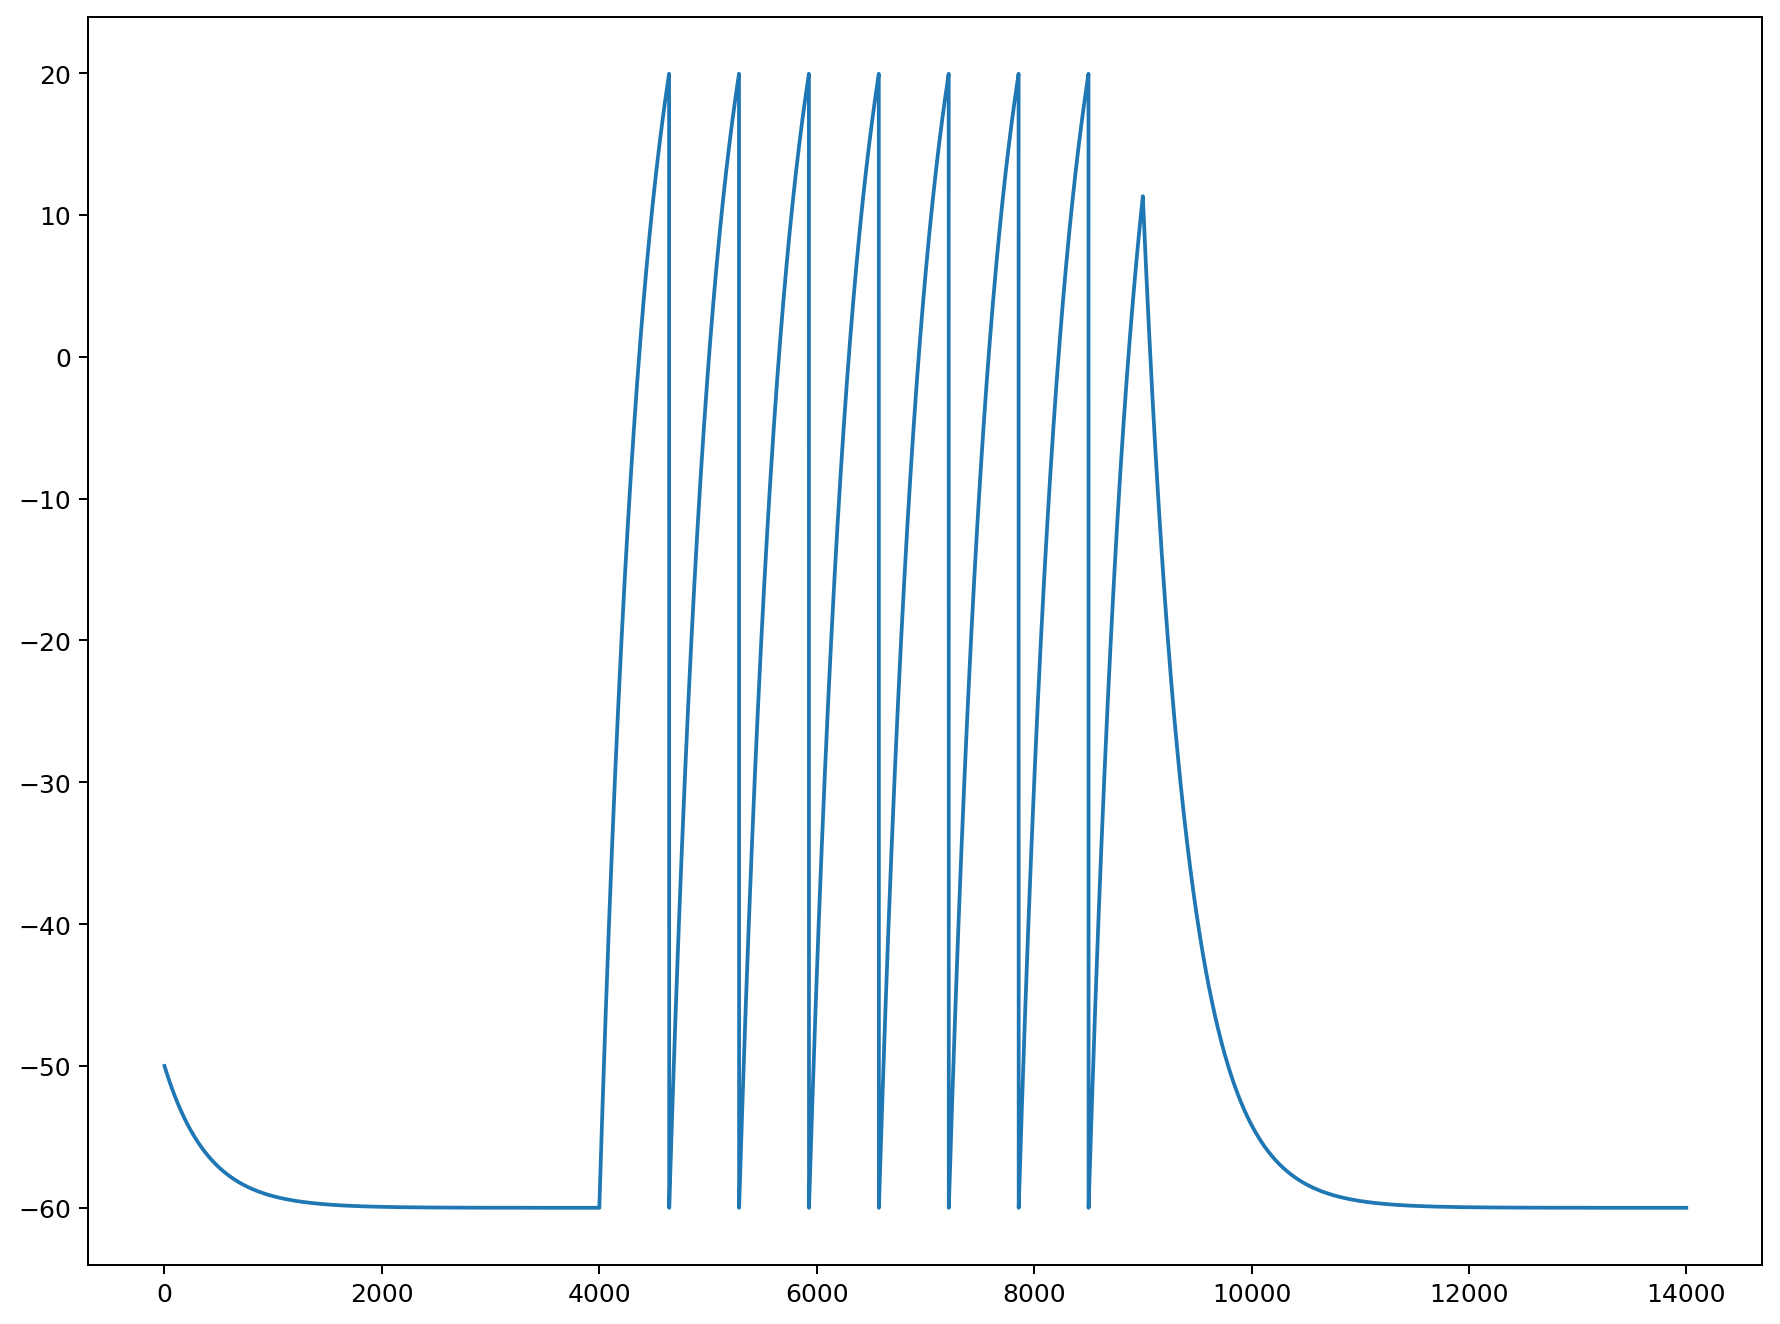

In [ ]:
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0

V_thresh = 20.0

vs = []
spike_times = []

while t < 70.0:
  vs.append(v)

  dv = -(v - V_0)/tau

  if t > 20.0 and t < 45.0:
    dv += 50.0

  v += dv * dt

  if v >= V_thresh:
    # spike
    spike_times.append(t)
    # reset
    v = V_0

  t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()

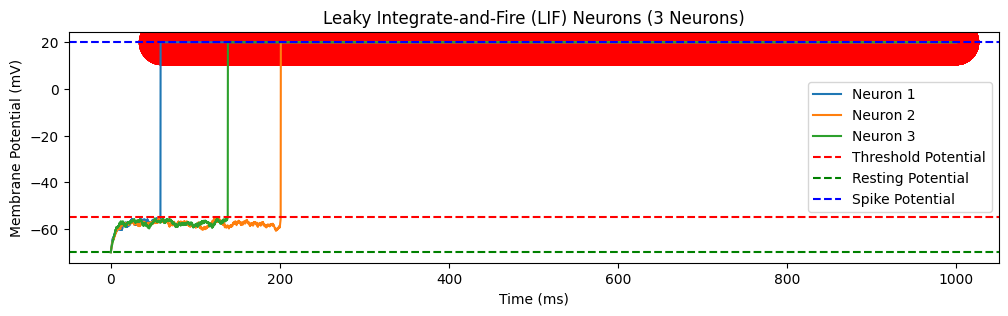

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_neurons = 3  # Number of neurons to simulate
V_rest = -70.0   # Resting membrane potential (mV)
V_thresh = -55.0   # Threshold potential (mV)
V_spike = 20.0   # Spike potential (mV)
dt = 0.1   # Time step (ms)
T = 1000   # Total simulation time (ms)
tau_min = 2.0   # Minimum tau value (ms)
tau_max = 10.0   # Maximum tau value (ms)
current_on_min = 5.0   # Minimum current_on value (pA)
current_on_max = 10.0   # Maximum current_on value (pA)
current_off_min = 0.0   # Minimum current_off value (pA)
current_off_max = 5.0   # Maximum current_off value (pA)

# Initialize variables
t = np.arange(0, T, dt)
vs = np.zeros((num_neurons, len(t)))
vs[:, 0] = V_rest
spike_times = [[] for _ in range(num_neurons)]  # List of spike times for each neuron

# Simulate LIF neurons
for i in range(1, len(t)):
    # Define random tau values for each neuron
    taus = np.random.uniform(tau_min, tau_max, num_neurons)

    # Define random current_on and current_off values for each neuron
    current_on = np.random.uniform(current_on_min, current_on_max, num_neurons)
    current_off = np.random.uniform(current_off_min, current_off_max, num_neurons)

    # Calculate change in membrane potential for each neuron
    dvs = (-vs[:, i-1] + V_rest) / taus
    dvs += np.where((t[i-1] > 200.0) & (t[i-1] < 400.0), current_on, current_off)

    # Update membrane potential for each neuron
    vs[:, i] = vs[:, i-1] + dvs * dt

    # Check for spikes for each neuron
    spikes = vs[:, i] >= V_thresh
    for n in range(num_neurons):
        if spikes[n]:
            # Spike
            spike_times[n].append(t[i])
            # Reset membrane potential
            vs[n, i] = V_spike

# Plot membrane potentials
for n in range(num_neurons):
    plt.plot(t, vs[n], label=f'Neuron {n+1}')
    plt.scatter(spike_times[n], np.full_like(spike_times[n], V_spike), marker='o', color='red', s=1000)

plt.axhline(y=V_thresh, color='r', linestyle='--', label='Threshold Potential')
plt.axhline(y=V_rest, color='g', linestyle='--', label='Resting Potential')
plt.axhline(y=V_spike, color='b', linestyle='--', label='Spike Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.title(f'Leaky Integrate-and-Fire (LIF) Neurons ({num_neurons} Neurons)')
plt.show()


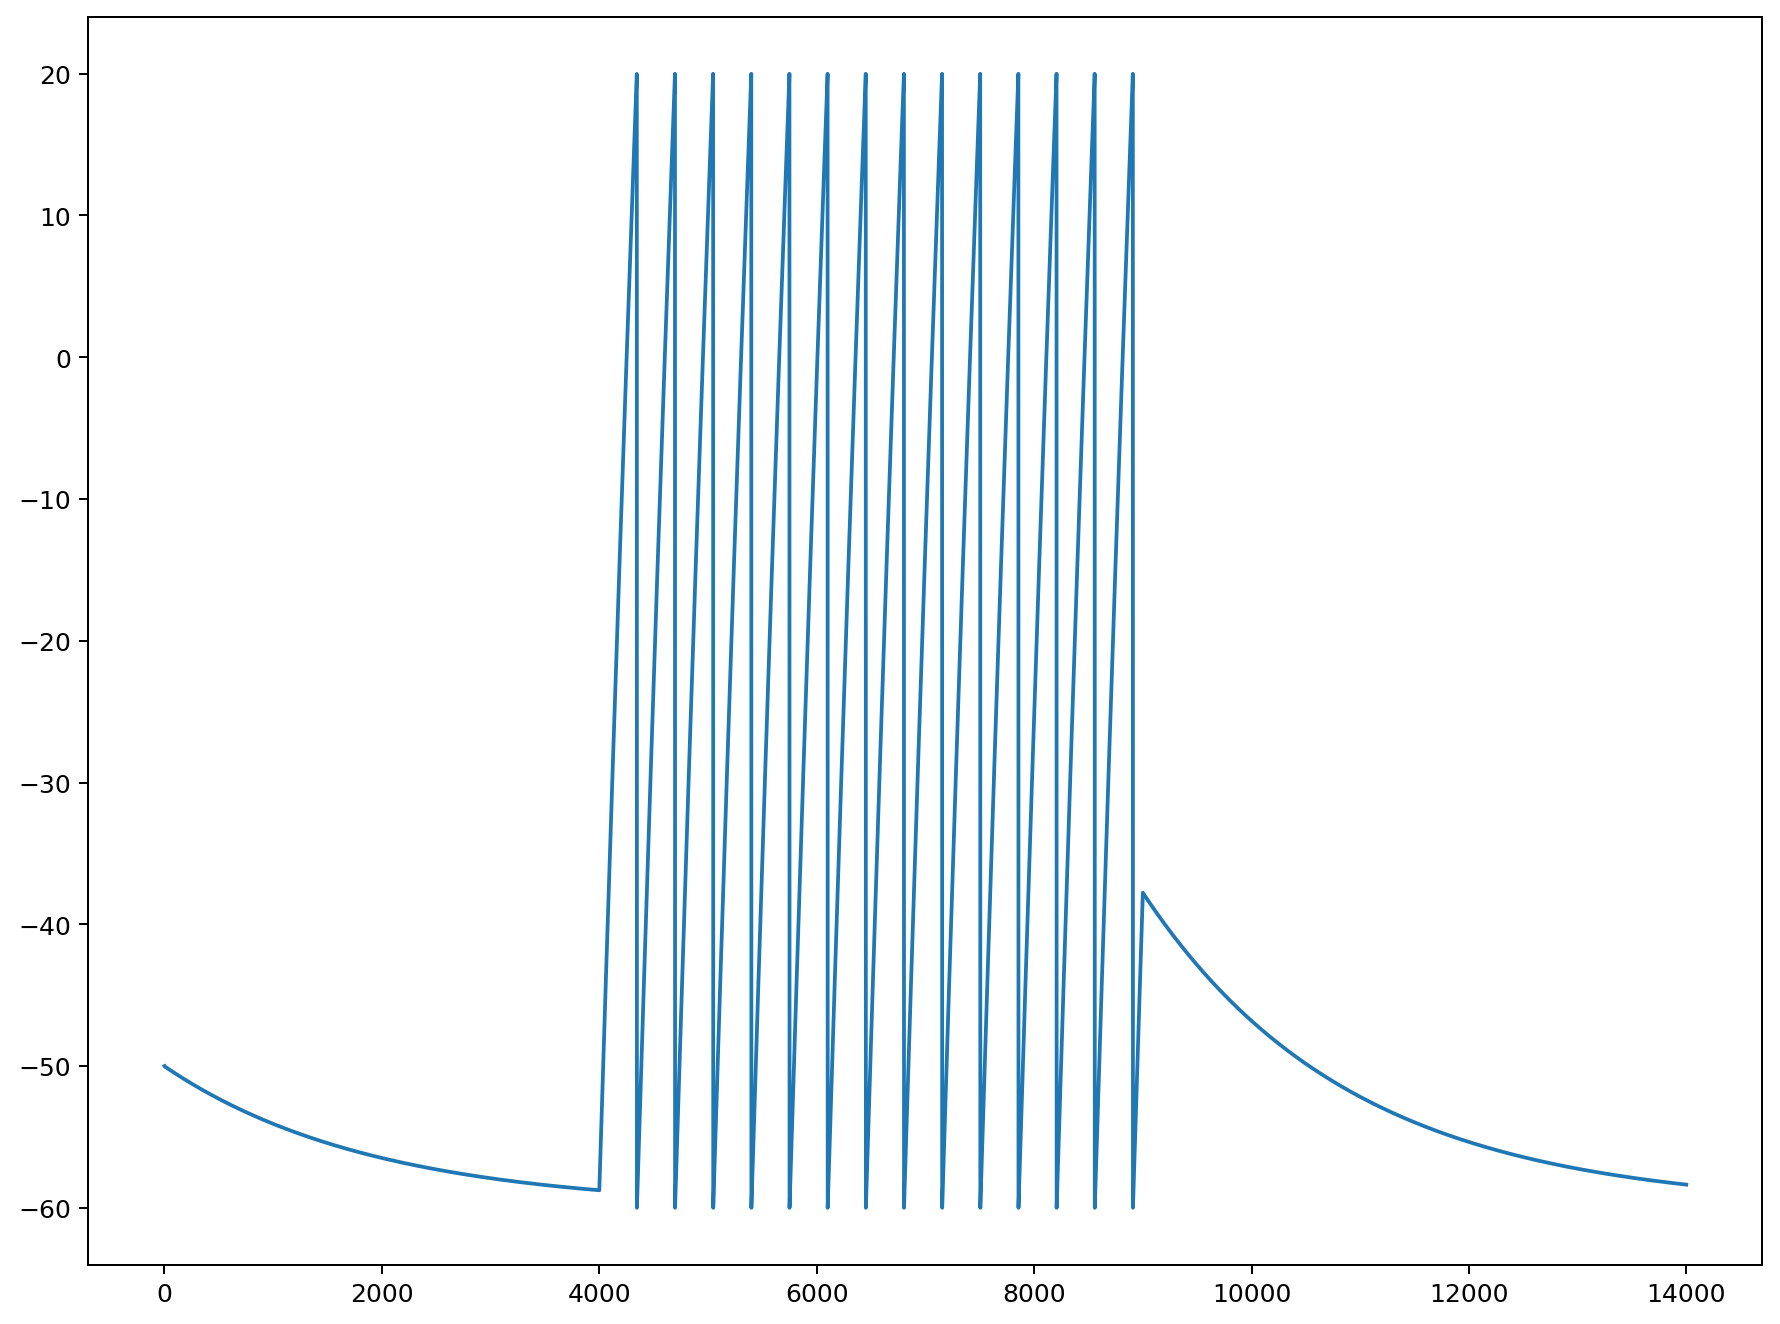

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0

V_thresh = 20.0

vs = []
spike_times = []

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0)/tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)

    if t > 20.0 and t < 45.0:
        dv += 50.0

    v += dv * dt

    if v >= V_thresh:
        # spike
        spike_times.append(t)
        # reset
        v = V_0

    t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()


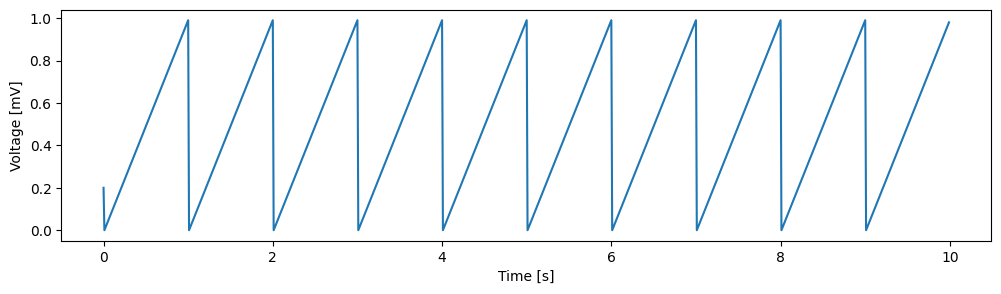

In [ ]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3) # Change the default figure size

I=1                          #Set the parameter I.
C=1                          #Set the parameter C.
Vth = 1;                     #Define the voltage threshold.
Vreset = 0;                  #Define the reset voltage.
dt=0.01                      #Set the timestep.
V = zeros([1000,1])          #Initialize V.
V[0]=0.2;                    #Set the initial condition.

for k in range(1,999):       #March forward in time,
    V[k+1] = V[k] + dt*(I/C) #Update the voltage,
    if V[k+1] > Vth:         #... and check if the voltage exceeds the threshold.
        V[k+1] = Vreset

t = arange(0,len(V))*dt      #Define the time axis.

figure()                     #Plot the results.
plot(t,V)
xlabel('Time [s]')
ylabel('Voltage [mV]');

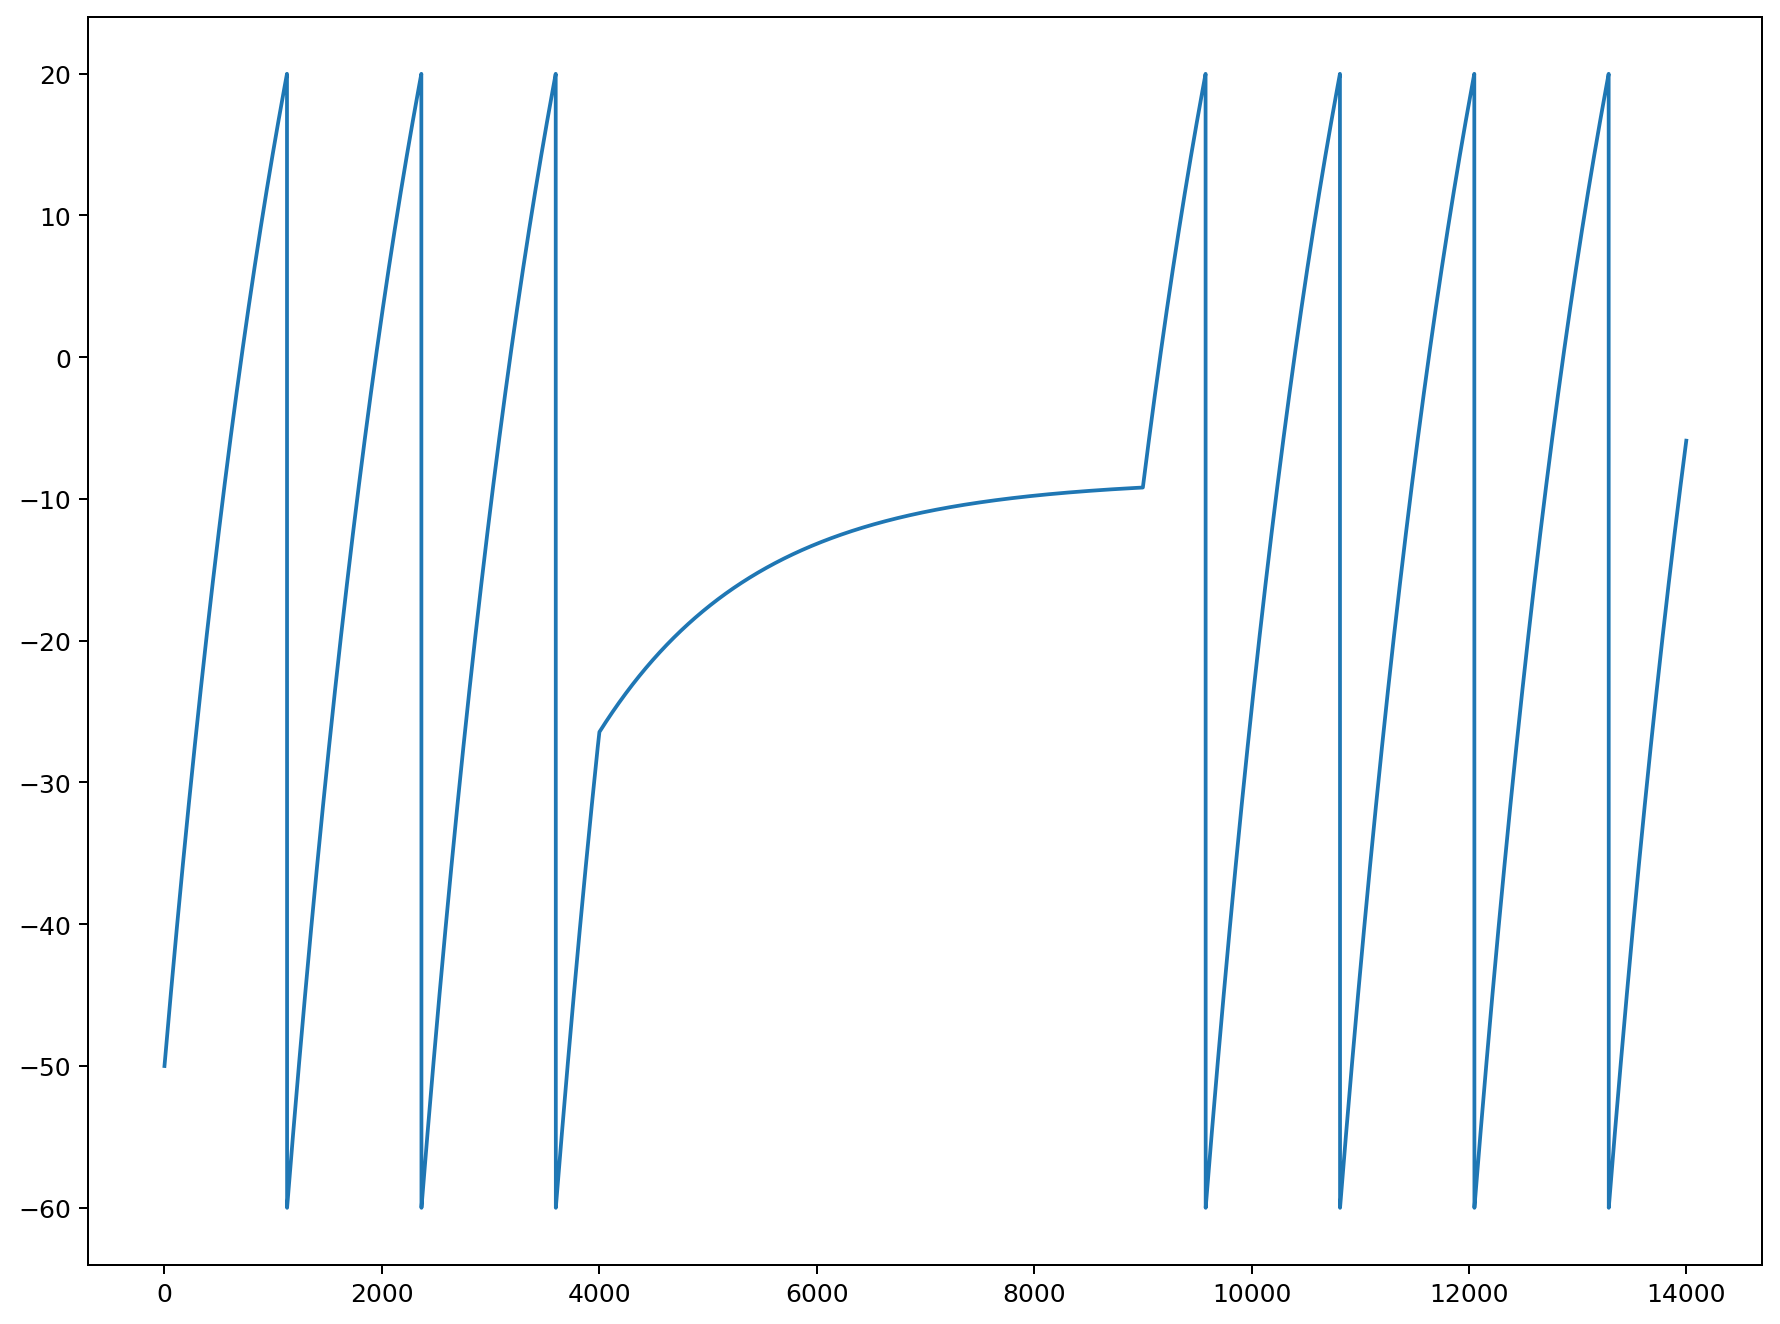

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0
V_thresh = 20.0

vs = []
spike_times = []

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0)/tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Add the current_on or current_off based on the time
    if t > 20.0 and t < 45.0:
        dv += current_on
    else:
        dv += current_off

    v += dv * dt

    if v >= V_thresh:
        # spike
        spike_times.append(t)
        # reset
        v = V_0

    t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()


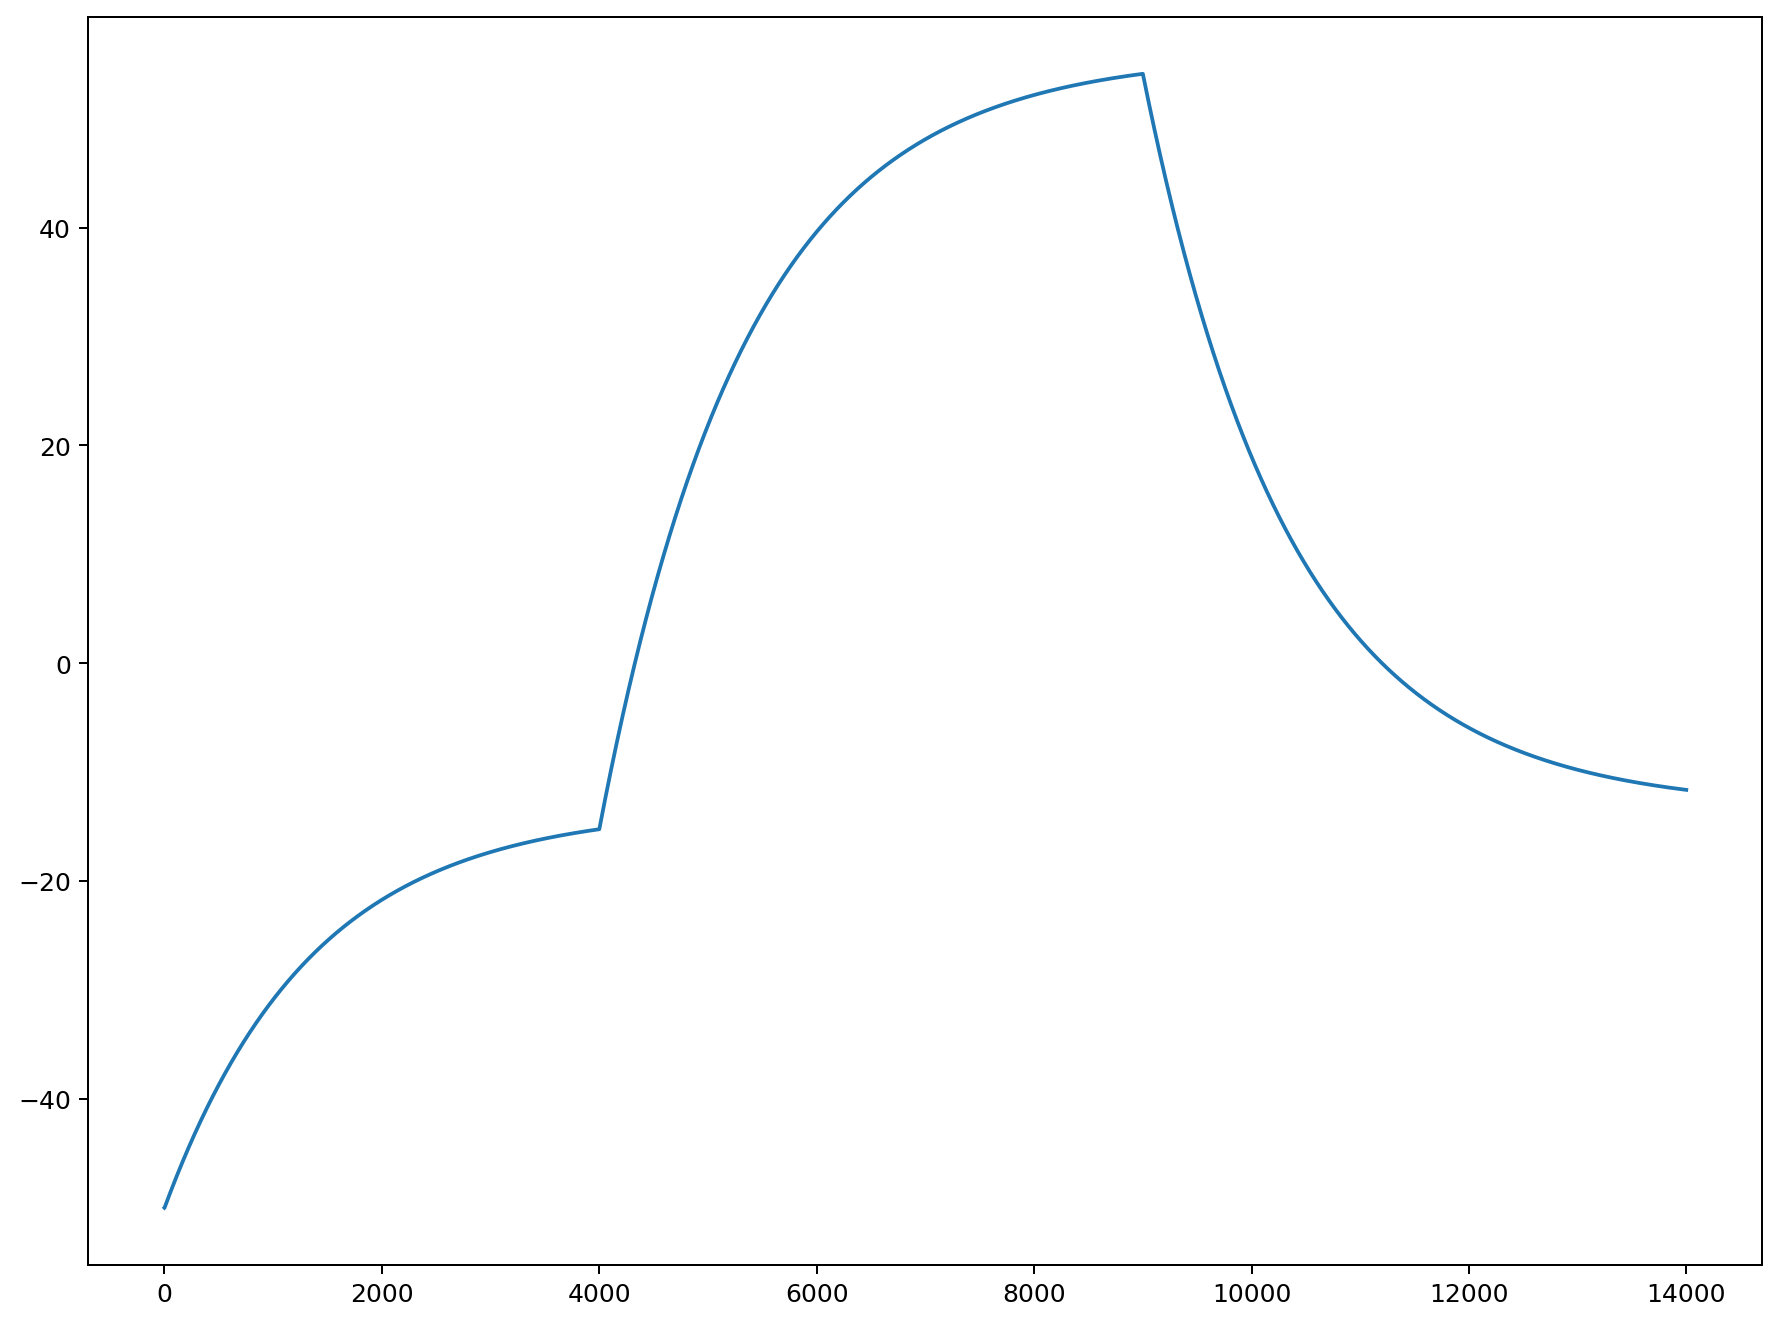

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0)/tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Add the current_on or current_off based on the time
    if t > 20.0 and t < 45.0:
        dv += current_on
    else:
        dv += current_off

    v += dv * dt

    t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()


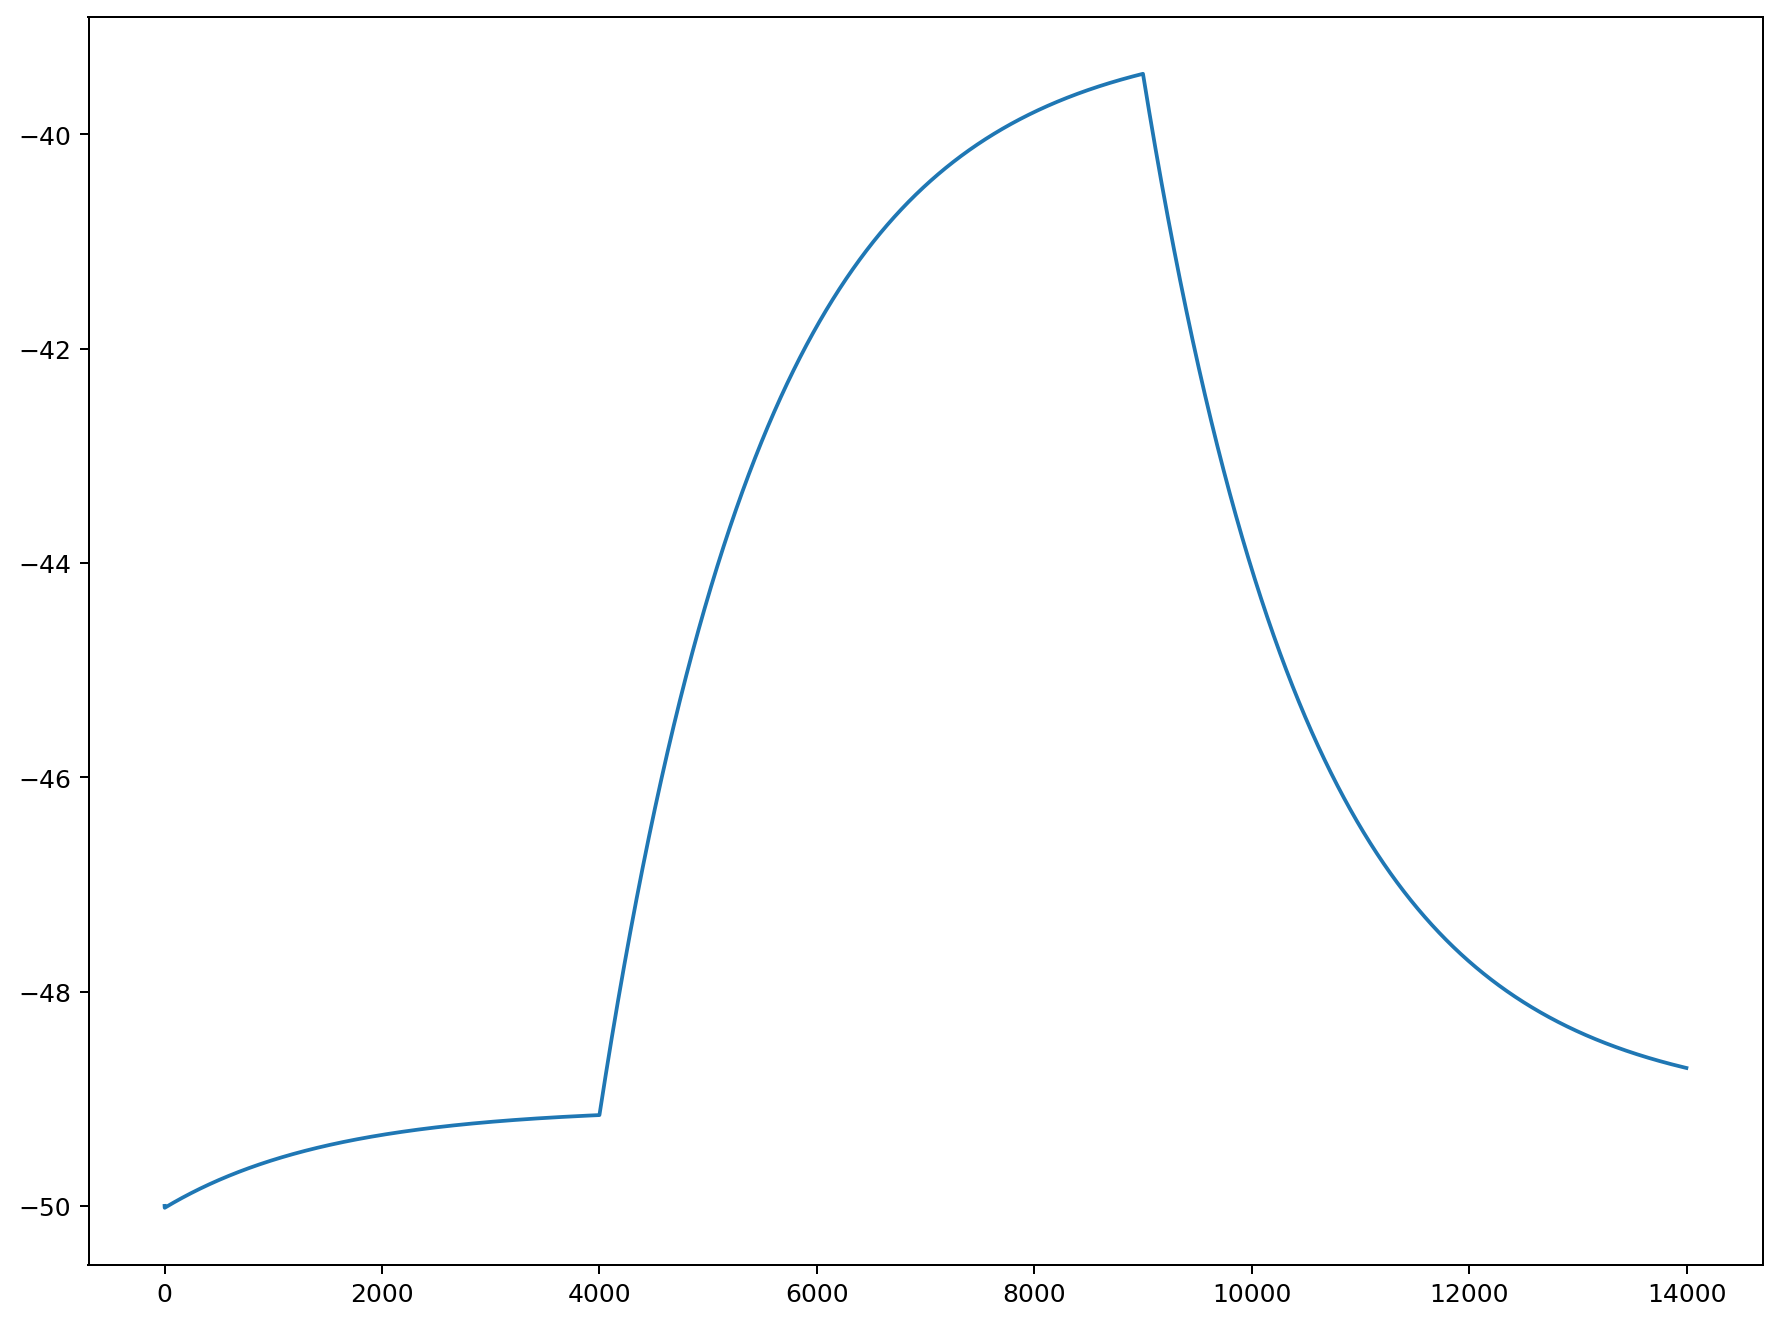

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0)/tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Add the current_on or current_off based on the time
    if t > 20.0 and t < 45.0:
        dv += current_on
    else:
        dv += current_off

    v += dv * dt

    t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()


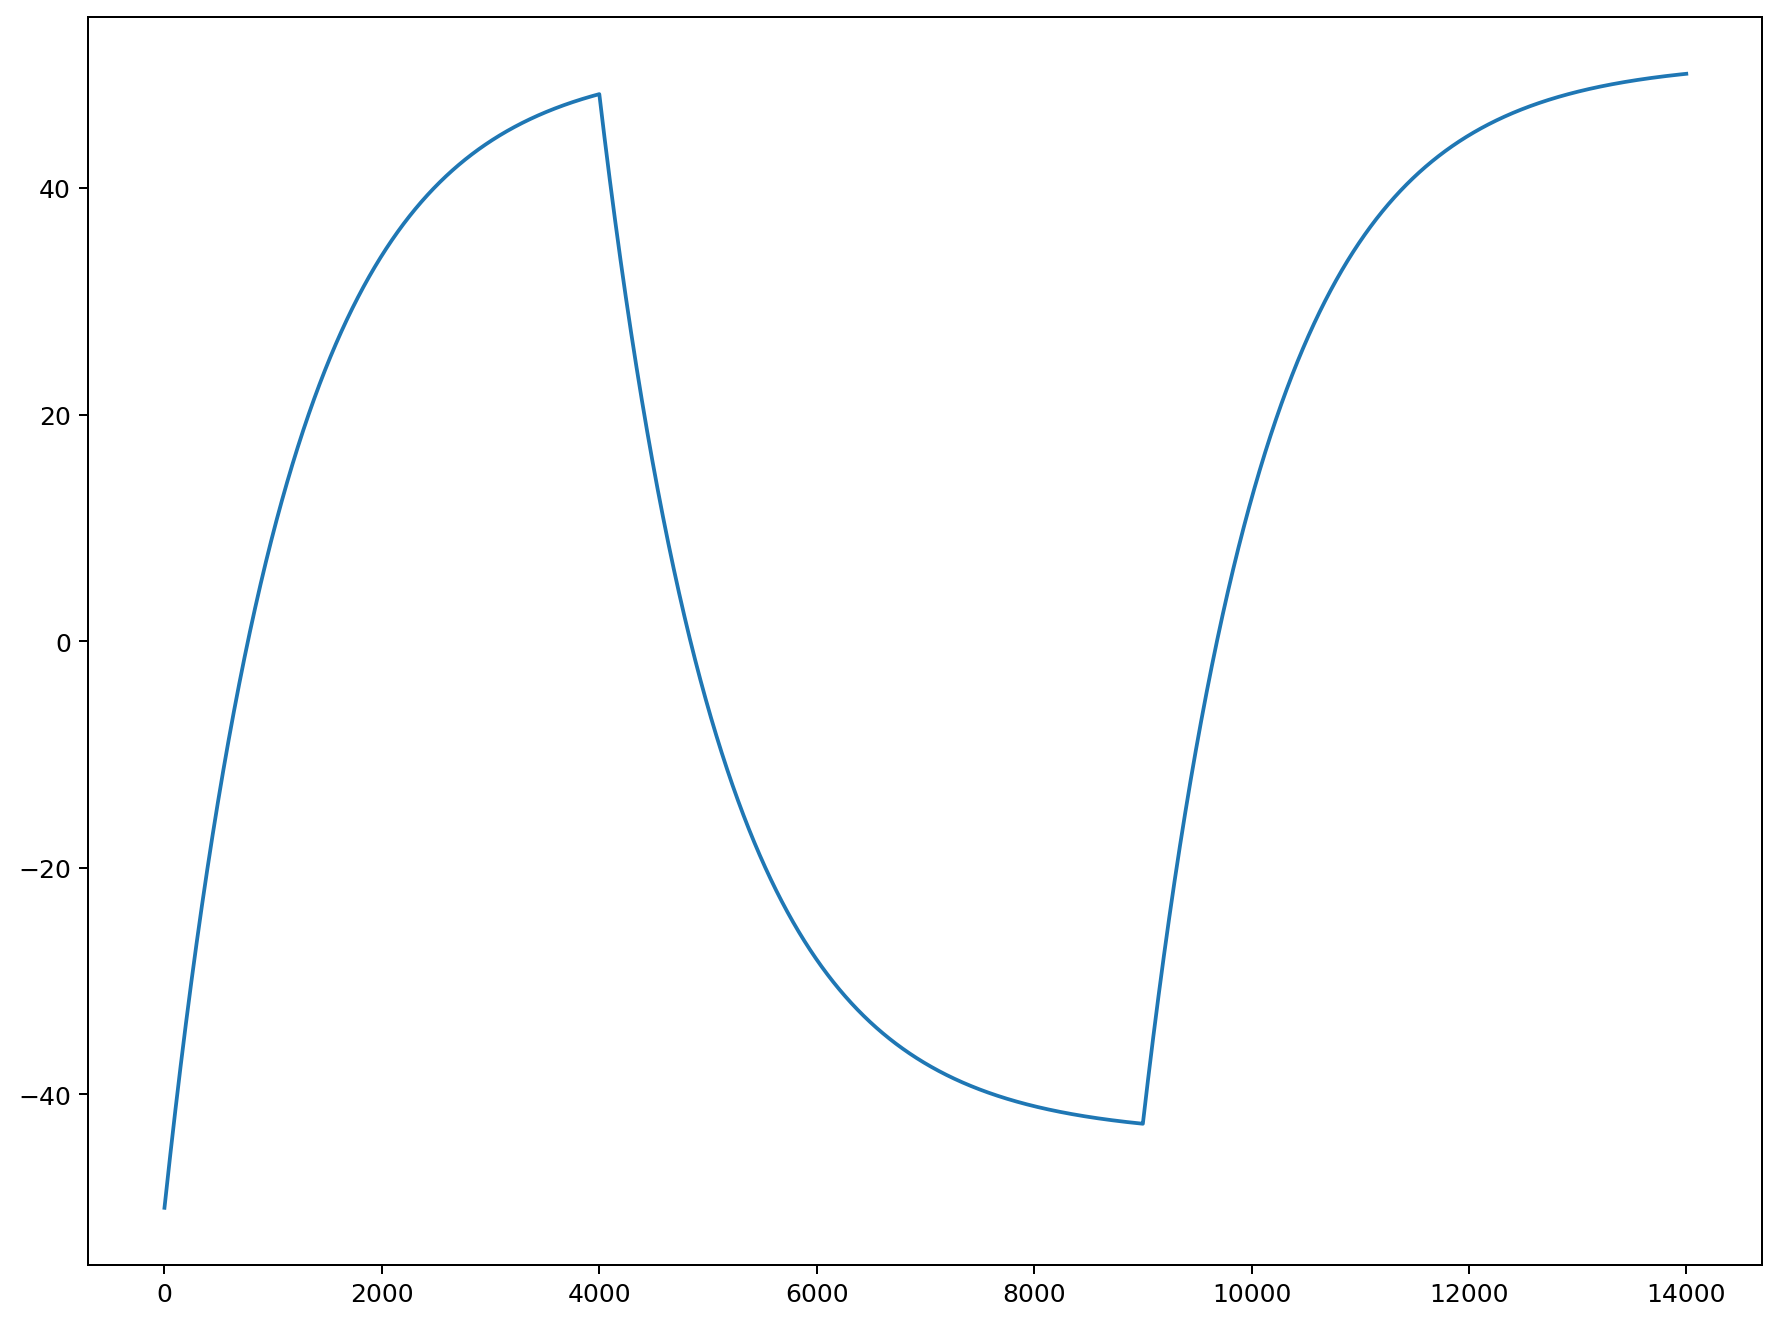

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0/200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0)/tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)

    # Change current_on and current_off every 5 seconds
    if t % 1000 == 0:
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Add the current_on or current_off based on the time
    if t > 20.0 and t < 45.0:
        dv += current_on
    else:
        dv += current_off

    v += dv * dt

    t += dt

fig = plt.figure(figsize=(12,9), dpi = 180)
plt.plot(vs)
plt.savefig("lif.png")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (500,) and (153,)

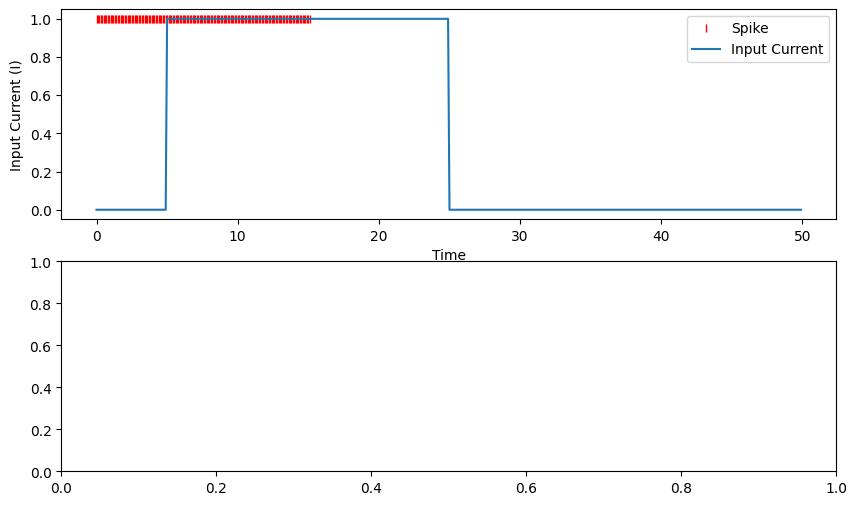

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class IntegrateAndFireNeuron:
    def __init__(self, threshold=1.0, reset_voltage=0.0, membrane_resistance=1.0, membrane_time_constant=10):
        self.threshold = threshold
        self.reset_voltage = reset_voltage
        self.membrane_resistance = membrane_resistance
        self.membrane_time_constant = membrane_time_constant
        self.membrane_voltage = reset_voltage
        self.spike_times = []

    def integrate(self, current_input, time_step):
        # Update membrane voltage
        delta_v = (current_input - self.membrane_voltage / self.membrane_resistance) * time_step / self.membrane_time_constant
        self.membrane_voltage += delta_v

        # Check for spike
        if self.membrane_voltage >= self.threshold:
            self.spike_times.append(time_step)
            self.membrane_voltage = self.reset_voltage

    def simulate(self, input_currents, time_step):
        for i, current_input in enumerate(input_currents):
            self.integrate(current_input, i * time_step)

def plot_voltage_and_spikes(neuron, time_step):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(0, len(neuron.spike_times) * time_step, time_step), [neuron.threshold] * len(neuron.spike_times), 'r|', label='Spike')
    plt.plot(np.arange(0, len(input_currents) * time_step, time_step), input_currents, label='Input Current')
    plt.ylabel('Input Current (I)')
    plt.xlabel('Time')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(np.arange(0, len(input_currents) * time_step, time_step), [neuron.reset_voltage] + neuron.spike_times, label='Membrane Voltage')
    plt.ylabel('Membrane Voltage (V)')
    plt.xlabel('Time')
    plt.legend()

    plt.show()

# Example usage
threshold = 1.0
reset_voltage = 0.0
membrane_resistance = 1.0
membrane_time_constant = 10
time_step = 0.1
input_currents = np.concatenate((np.zeros(50), np.ones(200), np.zeros(250)))  # Example input current

neuron = IntegrateAndFireNeuron(threshold, reset_voltage, membrane_resistance, membrane_time_constant)
neuron.simulate(input_currents, time_step)

plot_voltage_and_spikes(neuron, time_step)


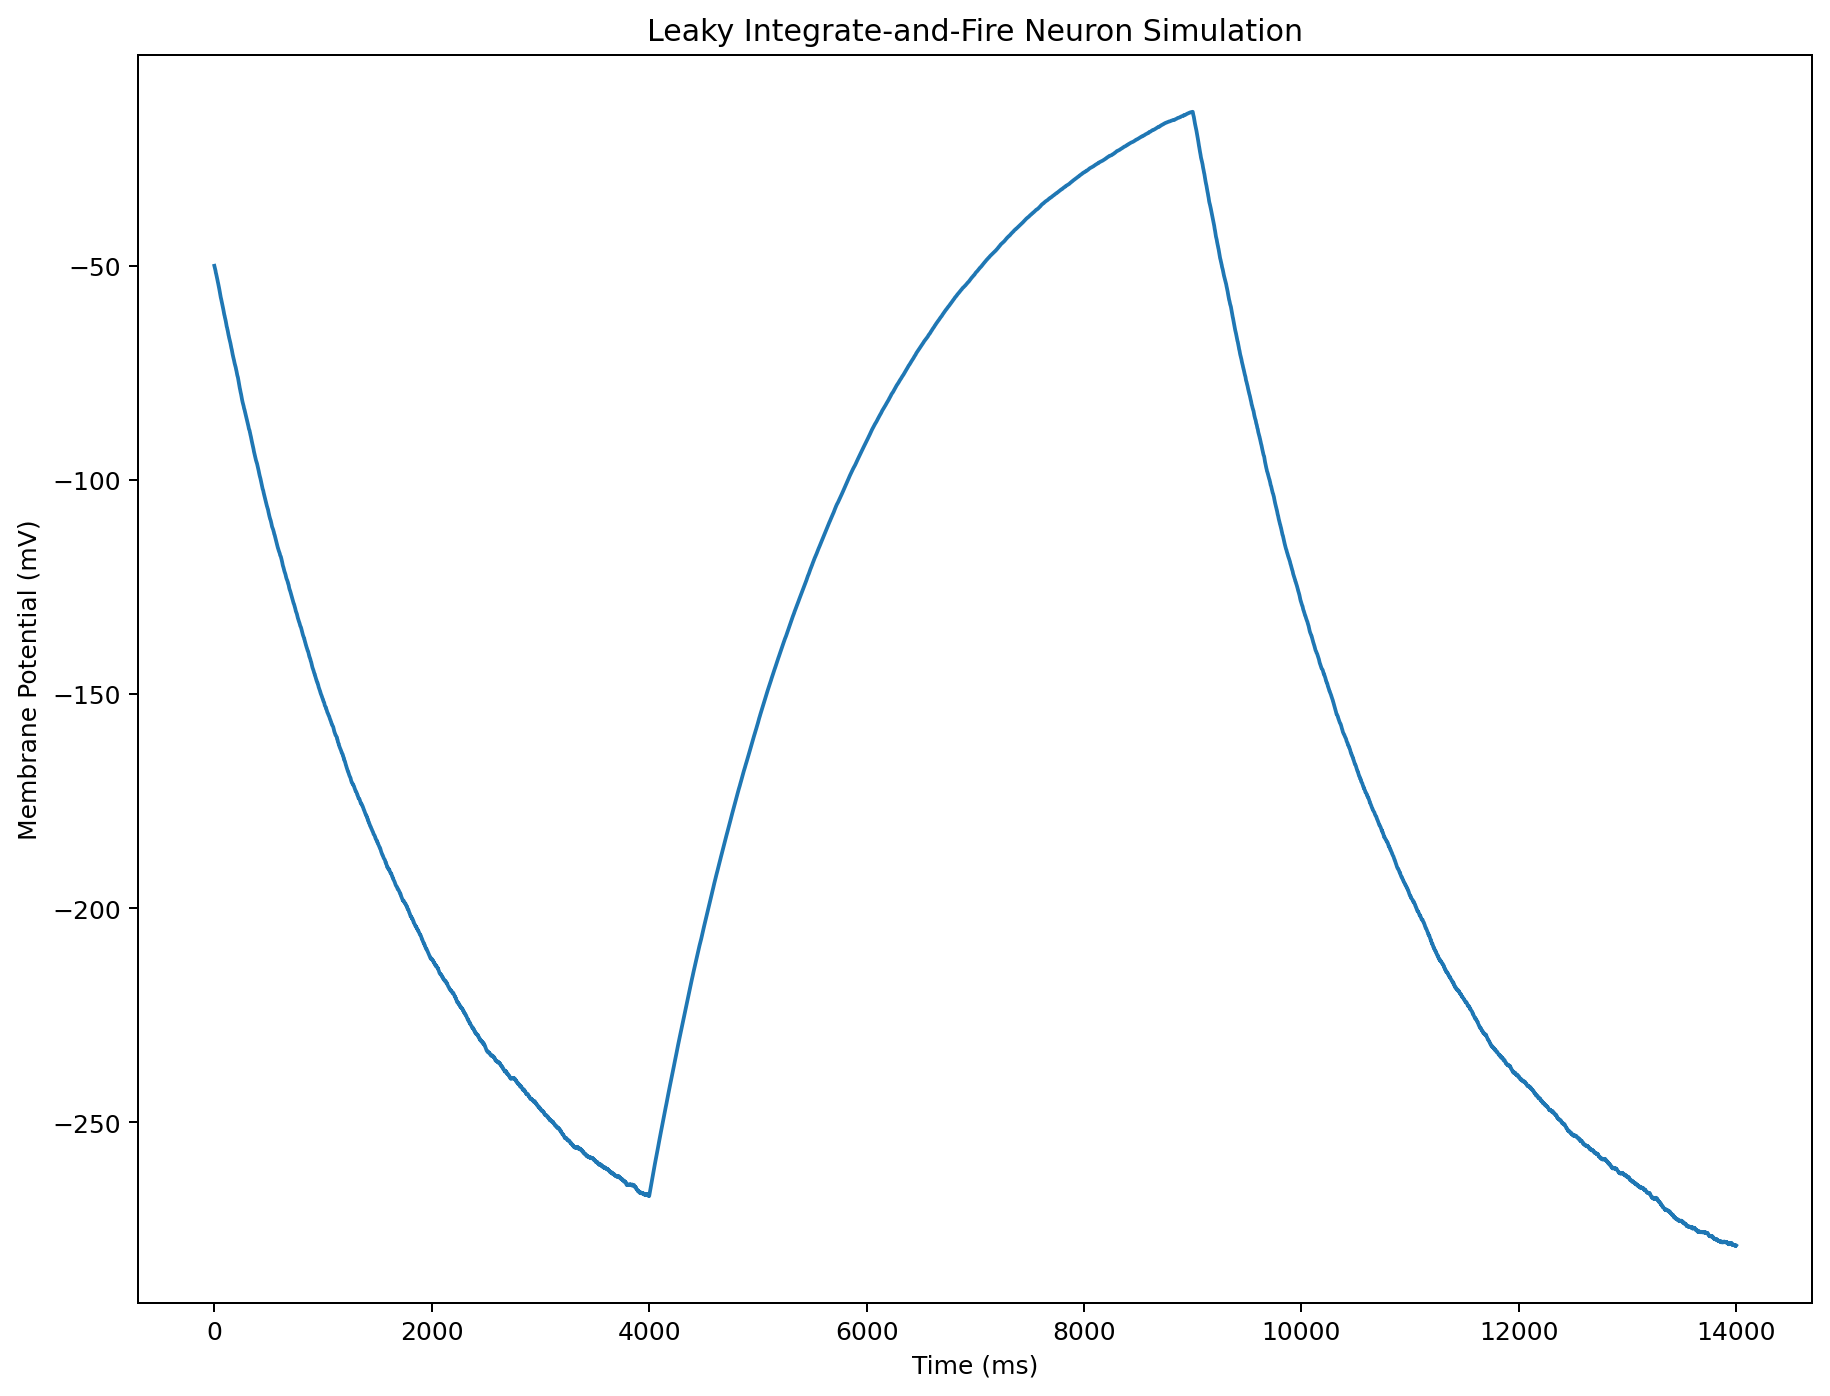

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0 / 200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)

    dv = -(v - V_0) / tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)

    # Change current_on and current_off every 5 seconds
    if t % 1000 == 0:
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Excitatory and inhibitory synaptic weights
    weight_on = np.random.uniform(0.5, 2.0)  # Excitatory synaptic weight
    weight_off = np.random.uniform(-2.0, -0.5)  # Inhibitory synaptic weight

    # Add the current_on or current_off based on the time, scaled by weights
    if t > 20.0 and t < 45.0:
        dv += weight_on * current_on
    else:
        dv += weight_off * current_off

    v += dv * dt

    t += dt

fig = plt.figure(figsize=(12, 9), dpi=180)
plt.plot(vs)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.savefig("lif.png")
plt.show()


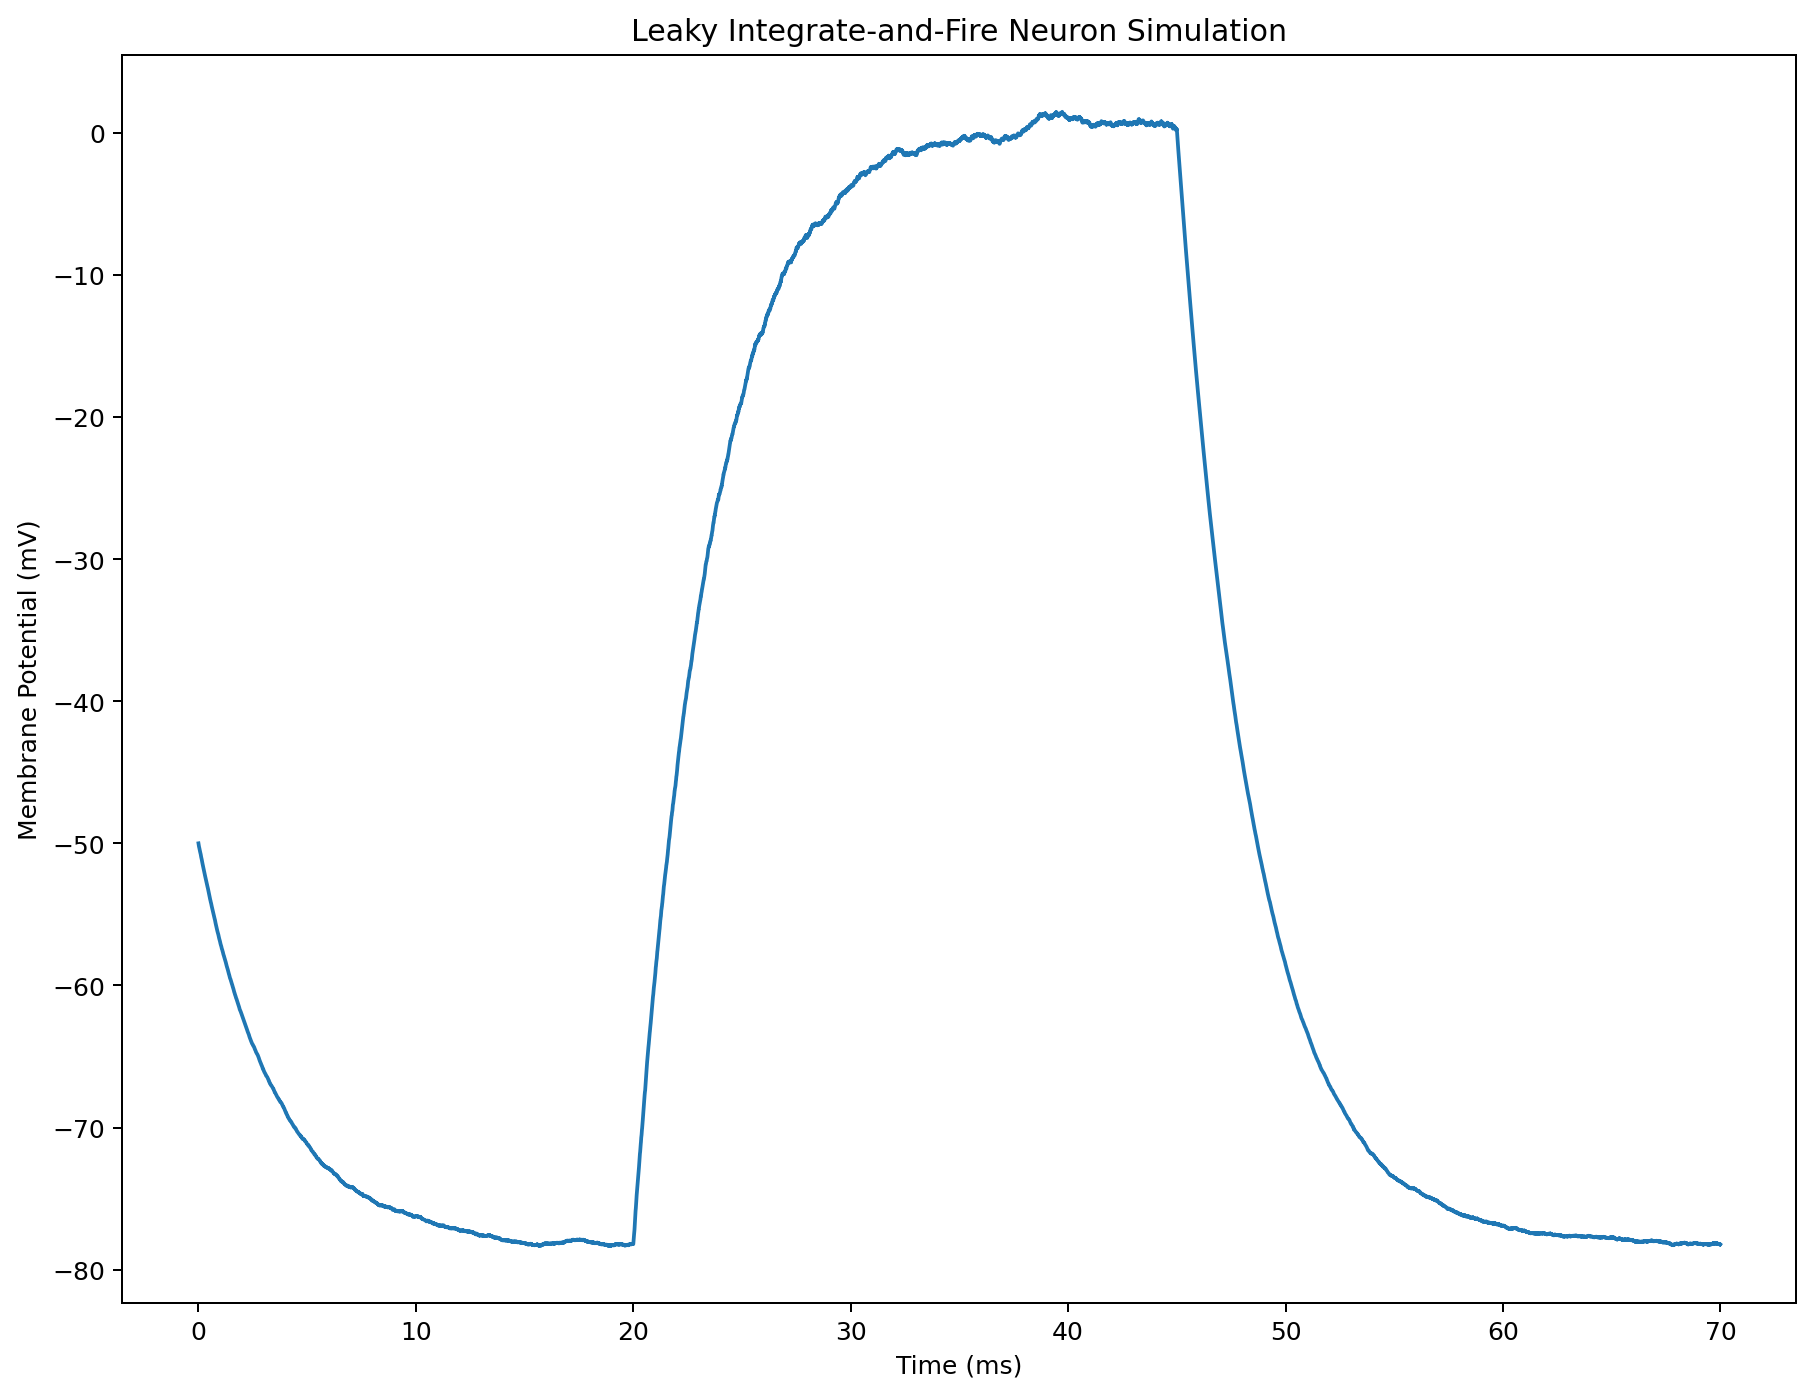

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = 0.0
dt = 1.0 / 200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []  # List to store membrane potential
ts = []  # List to store time
current_ons = []  # List to store current_on
current_offs = []  # List to store current_off

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)
    ts.append(t)
    current_ons.append(current_on)
    current_offs.append(current_off)

    dv = -(v - V_0) / tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)

    # Change current_on and current_off every 5 seconds
    if t % 1000 == 0:
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Excitatory and inhibitory synaptic weights
    weight_on = np.random.uniform(0.5, 2.0)  # Excitatory synaptic weight
    weight_off = np.random.uniform(-2.0, -0.5)  # Inhibitory synaptic weight

    # Add the current_on or current_off based on the time, scaled by weights
    if t > 20.0 and t < 45.0:
        dv += weight_on * current_on
    else:
        dv += weight_off * current_off

    v += dv * dt

    t += dt

# Save the collected data to a file
data = np.column_stack((ts, vs, current_ons, current_offs))
np.savetxt('lif_simulation_data.csv', data, delimiter=',', header='Time (ms),Membrane Potential (mV),Current On,Current Off', comments='')

# Plot the membrane potential over time
fig = plt.figure(figsize=(12, 9), dpi=180)
plt.plot(ts, vs)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.savefig("lif.png")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.flush_and_unmount()


# Mount Google Drive
drive.mount('/content/drive')

t = 0.0
dt = 1.0 / 200.0

v = -50.0
V_0 = -60.0
tau = 2.0

vs = []  # List to store membrane potential
ts = []  # List to store time
current_ons = []  # List to store current_on
current_offs = []  # List to store current_off

# Initialize the current_on and current_off
current_on = np.random.uniform(0, 20)
current_off = np.random.uniform(0, 20)

while t < 70.0:
    vs.append(v)
    ts.append(t)
    current_ons.append(current_on)
    current_offs.append(current_off)

    dv = -(v - V_0) / tau

    # Randomly choose a new tau value every 200 milliseconds
    if t % 200 == 0:
        tau = np.random.uniform(2, 10)

    # Change current_on and current_off every 5 seconds
    if t % 1000 == 0:
        current_on = np.random.uniform(0, 20)
        current_off = np.random.uniform(0, 20)

    # Excitatory and inhibitory synaptic weights
    weight_on = np.random.uniform(0.5, 2.0)  # Excitatory synaptic weight
    weight_off = np.random.uniform(-2.0, -0.5)  # Inhibitory synaptic weight

    # Add the current_on or current_off based on the time, scaled by weights
    if t > 20.0 and t < 45.0:
        dv += weight_on * current_on
    else:
        dv += weight_off * current_off

    v += dv * dt

    t += dt

# Save the collected data to a file in Google Drive
data_file_path = '/content/drive/My Drive/lif_simulation_data.csv'
data = np.column_stack((ts, vs, current_ons, current_offs))
np.savetxt(data_file_path, data, delimiter=',', header='Time (ms),Membrane Potential (mV),Current On,Current Off', comments='')

# Plot the membrane potential over time
fig = plt.figure(figsize=(12, 9), dpi=180)
plt.plot(ts, vs)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.savefig("/content/drive/My Drive/lif.png")
plt.show()


Drive not mounted, so nothing to flush and unmount.


MessageError: Error: credential propagation was unsuccessful